**ÉTAPE 0** : préparation des données

In [2]:
import pandas as pd 
import process
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

In [7]:
import warnings 


warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

lookback_window_0 = [0, 50]
number_of_clusters = 38
sigma = 10e-2
clustering_method = 'SPONGE' 
number_of_repetition = 20
number_of_window=50
evaluation_window = 5
eta_values = np.linspace(0.001, 0.02, 20)
np.set_printoptions(precision=4, suppress=True)

overall_return, PnL, portfolio_value, sharpe_ratio, daily_PnL = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, number_of_window=number_of_window, evaluation_window=evaluation_window, eta=0.04)

1.0253753346082903
step 1
1.0309639870235818
step 2
1.0337110181921236
step 3
1.0362482934885175
step 4
1.0265505731234248
step 5
1.0336891926095693
step 6
1.0425106338269732
step 7
1.0362197982980386
step 8
1.0415046613945032
step 9
1.0391052837157018
step 10
1.0485672530260752
step 11
1.051481731008477
step 12
1.0608395051756798
step 13
1.0550347265040985
step 14
1.0609943857790267
step 15
1.0689537919784653
step 16
1.0737342719973606
step 17
1.0682567930152687
step 18
1.0617287191984581
step 19
1.0743938238355613
step 20
1.0844551202279864
step 21
1.0844060185996498
step 22
1.0806310396985368
step 23
1.0840049762630999
step 24
1.0976097780626193
step 25
1.0840492024558166
step 26
1.0831737093263885
step 27
1.0858981259442497
step 28
1.0787036555202751
step 29
1.070151436065273
step 30
1.0724837236248124
step 31
1.0854492510917189
step 32
1.097522573659074
step 33
1.0976684327837654
step 34
1.1032570530978596
step 35
1.107085458215489
step 36
1.1132396266396565
step 37
1.119582996365

In [8]:
PnL[-1], eta_values[15]

(0.20240113780532631, 0.016)

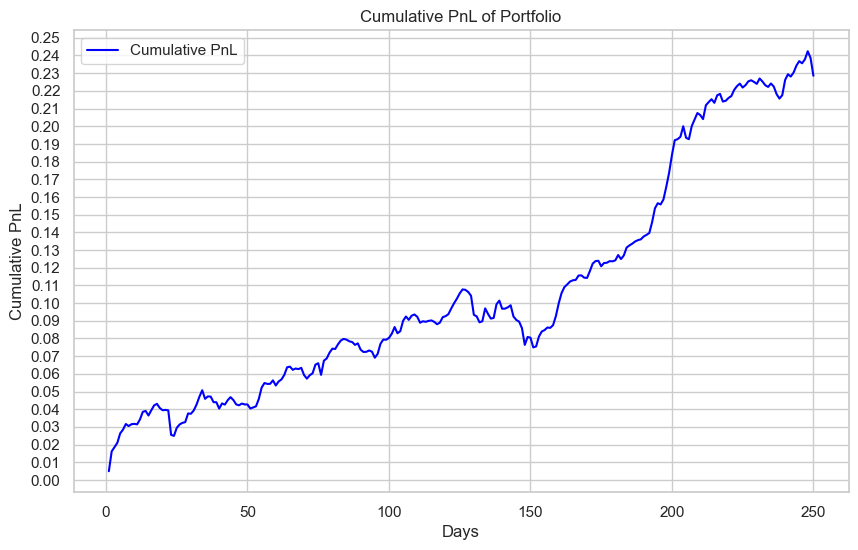

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=days, y=PnL, label='Cumulative PnL', color='blue')

# Ajouter des titres et des légendes
plt.title('Cumulative PnL of Portfolio')
plt.xlabel('Days')
plt.ylabel('Cumulative PnL')

# Personnaliser l'axe des ordonnées avec un pas de 0.01
plt.yticks(np.arange(0, max(PnL) + 0.01, 0.01))

# Afficher le graphique
plt.show()

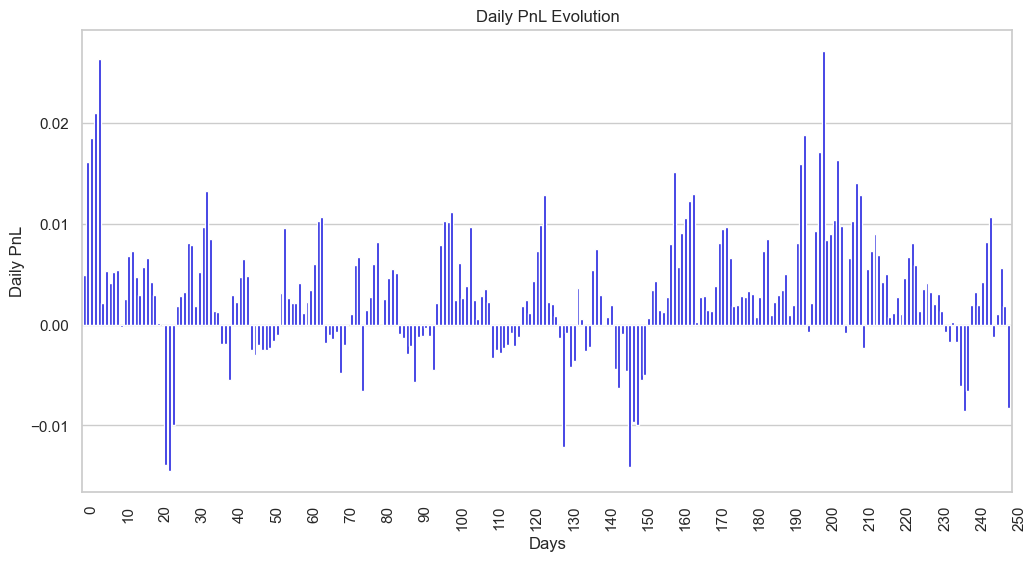

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(daily_PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer l'évolution quotidienne de la PnL sous forme de diagramme à barres avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=days, y=daily_PnL, color='blue', width=0.8)  # Ajustez la largeur ici

# Rotation des étiquettes de l'axe des abscisses de 45 degrés avec un ajustement
ax.set_xticks(np.arange(0,251,10))
ax.set_xticklabels(ax.get_xticks(), rotation=90, ha='right', rotation_mode='anchor')

# Ajouter des titres et des légendes
plt.title('Daily PnL Evolution')
plt.xlabel('Days')
plt.ylabel('Daily PnL')

# Afficher le graphique
plt.show()
